In [1]:
# COMP 5300 Final Project
# Musculoskeletal Abnormality Detection
# Michelle, Jennifer, Amelia, Deva

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
%matplotlib inline
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2024-04-19 20:15:01.715842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 20:15:02.261000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Display file directory tree
def print_file_directory(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 3 * level
        subindent = ' ' * 3 * (level + 1)
        print('{}{}/'.format(indent, os.path.basename(root)))
        for f in files:
            print('{}{}'.format(subindent, f))

In [4]:
# print_file_directory('MURA-v1.1')

In [5]:
# Remove .DS_Store if needed
# ! find . -name '.DS_Store' -type f -delete

In [6]:
# Images stored and separated in folders by upper extremity study type
os.listdir('MURA-v1.1/train')

['XR_FOREARM',
 'XR_HAND',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_HUMERUS',
 'XR_ELBOW']

In [7]:
os.listdir('MURA-v1.1/valid')

['XR_FOREARM',
 'XR_HAND',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_HUMERUS',
 'XR_ELBOW']

In [8]:
# michelle
# Restructure and consolidate data with image paths and labels
# Example path: MURA-v1.1/train/XR_HAND/patient05509/study1_negative/image1.png

def restructure_dataset(path):
    data = []
    
    for study_type in os.listdir(path):
        # Get study type path to access patient folders
        study_type_path = path + '/' + str(study_type)

        for patient_id in os.listdir(study_type_path):
            # Get patient id path to access study folders
            study_id = study_type_path + '/' + str(patient_id)
            for label in os.listdir(study_id):
                # Get abnormality label as positive (1) or negative (0)
                if label.split('_')[-1] == 'positive': 
                    num_label = 1
                elif label.split('_')[-1] == 'negative':
                    num_label = 0

                # Get study id and label path to access image folders
                label_path = study_id + '/' + str(label)
                for img in os.listdir(label_path):
                    img_path = label_path + '/' + str(img)

                    # Add data to array
                    data.append(
                        {
                            'study_type': study_type,
                            'patient_id': patient_id,
                            'img_path': img_path,
                            'label': num_label,
                        }
                    )
    return data

In [9]:
# michelle
# Consolidate all training data into single dataframe 
df_train = pd.DataFrame(restructure_dataset('MURA-v1.1/train'))
df_train.head()

,study_type,patient_id,img_path,label
0,XR_FOREARM,patient09232,MURA-v1.1/train/XR_FOREARM/patient09232/study1...,1
1,XR_FOREARM,patient09232,MURA-v1.1/train/XR_FOREARM/patient09232/study1...,1
2,XR_FOREARM,patient09202,MURA-v1.1/train/XR_FOREARM/patient09202/study1...,1
3,XR_FOREARM,patient09202,MURA-v1.1/train/XR_FOREARM/patient09202/study1...,1
4,XR_FOREARM,patient09396,MURA-v1.1/train/XR_FOREARM/patient09396/study1...,0


In [10]:
df_train.shape

(36812, 4)

In [11]:
df_train.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [12]:
# michelle
# Preprocessing & stratified sampling to get validation dataset

df_train['combined_study_type_label'] = df_train['study_type'] + '_' + df_train['label'].astype(str)

df_train, df_valid = train_test_split(df_train, test_size = 0.1, stratify = df_train['combined_study_type_label'])

df_train = df_train.drop(columns=['combined_study_type_label'])
df_valid = df_valid.drop(columns=['combined_study_type_label'])

In [13]:
df_train.head()

,study_type,patient_id,img_path,label
1035,XR_FOREARM,patient09390,MURA-v1.1/train/XR_FOREARM/patient09390/study1...,0
32199,XR_ELBOW,patient05030,MURA-v1.1/train/XR_ELBOW/patient05030/study1_p...,1
18083,XR_SHOULDER,patient01541,MURA-v1.1/train/XR_SHOULDER/patient01541/study...,0
28306,XR_WRIST,patient06799,MURA-v1.1/train/XR_WRIST/patient06799/study1_p...,1
13913,XR_SHOULDER,patient00186,MURA-v1.1/train/XR_SHOULDER/patient00186/study...,1


In [14]:
df_train.shape

(33130, 4)

In [15]:
df_valid.head()

,study_type,patient_id,img_path,label
19615,XR_SHOULDER,patient00919,MURA-v1.1/train/XR_SHOULDER/patient00919/study...,1
33077,XR_ELBOW,patient01281,MURA-v1.1/train/XR_ELBOW/patient01281/study1_p...,1
31940,XR_ELBOW,patient05107,MURA-v1.1/train/XR_ELBOW/patient05107/study1_p...,1
2465,XR_HAND,patient10899,MURA-v1.1/train/XR_HAND/patient10899/study1_ne...,0
1141,XR_FOREARM,patient09351,MURA-v1.1/train/XR_FOREARM/patient09351/study1...,0


In [16]:
df_valid.shape

(3682, 4)

In [17]:
# Consolidate all test data into single dataframe
df_test = pd.DataFrame(restructure_dataset('MURA-v1.1/valid'))
df_test.head()

,study_type,patient_id,img_path,label
0,XR_FOREARM,patient11463,MURA-v1.1/valid/XR_FOREARM/patient11463/study1...,0
1,XR_FOREARM,patient11463,MURA-v1.1/valid/XR_FOREARM/patient11463/study1...,0
2,XR_FOREARM,patient11449,MURA-v1.1/valid/XR_FOREARM/patient11449/study1...,0
3,XR_FOREARM,patient11449,MURA-v1.1/valid/XR_FOREARM/patient11449/study1...,0
4,XR_FOREARM,patient11408,MURA-v1.1/valid/XR_FOREARM/patient11408/study1...,1


In [18]:
df_test.shape

(3197, 4)

In [19]:
df_test.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [20]:
# amelia
# Find problematic images and remove them from the dataset
# (for some reason a few of the images were causing us problems, so we just exlude them)
# https://stackoverflow.com/questions/71572762/cannot-identify-image-file-io-bytesio-object-at-0x000001e6cf13a108
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

all_image_paths = []
all_image_paths.extend(df_train['img_path'])
all_image_paths.extend(df_valid['img_path'])
all_image_paths.extend(df_test['img_path'])

problem_paths = []

for img_p in all_image_paths:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)
        problem_paths.append(img_p)

for prob_path in problem_paths:
    df_train.drop(df_train.loc[df_train['img_path']==prob_path].index, inplace=True)
    df_valid.drop(df_valid.loc[df_valid['img_path']==prob_path].index, inplace=True)
    df_test.drop(df_test.loc[df_test['img_path']==prob_path].index, inplace=True)

MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image3.png
MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/._image1.png
MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image2.png
MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image1.png


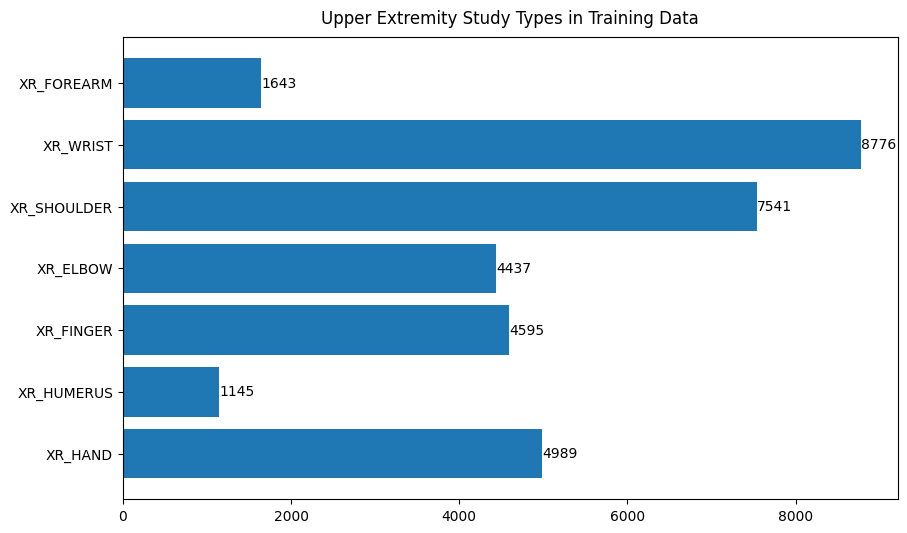

In [21]:
# michelle
# Exploratory analysis
study_types = ['XR_HAND', 'XR_HUMERUS', 'XR_FINGER', 'XR_ELBOW', 'XR_SHOULDER', 'XR_WRIST', 'XR_FOREARM']

def print_type_values(df, title):
    study_counts = {}
    for study_type in study_types:
        study_counts[study_type] = (df.study_type == study_type).sum()
        
    fig, ax = plt.subplots(figsize = (10, 6))
    bars = ax.barh(list(study_counts.keys()), list(study_counts.values()))
    ax.bar_label(bars)
    plt.title(title, pad = 10)
    plt.show()

print_type_values(df_train, "Upper Extremity Study Types in Training Data")

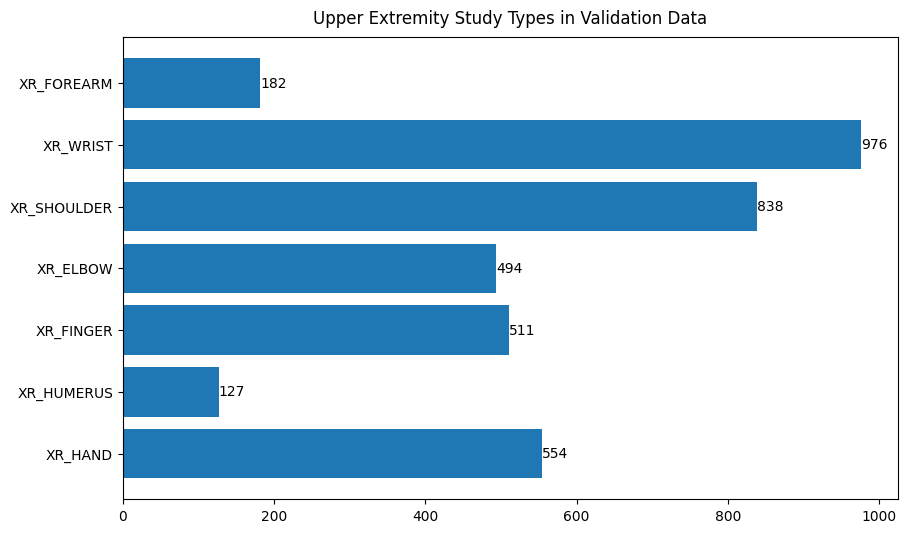

In [22]:
print_type_values(df_valid, "Upper Extremity Study Types in Validation Data")

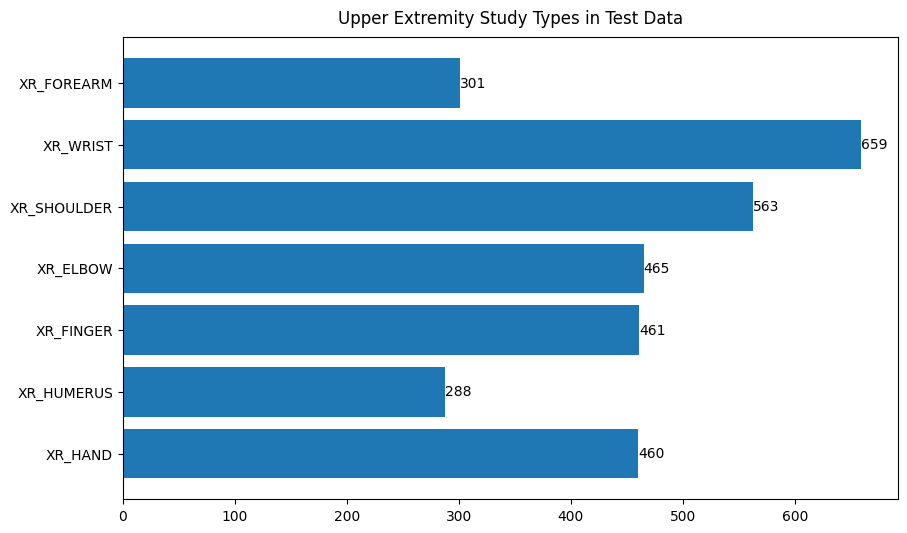

In [23]:
print_type_values(df_test, "Upper Extremity Study Types in Test Data")

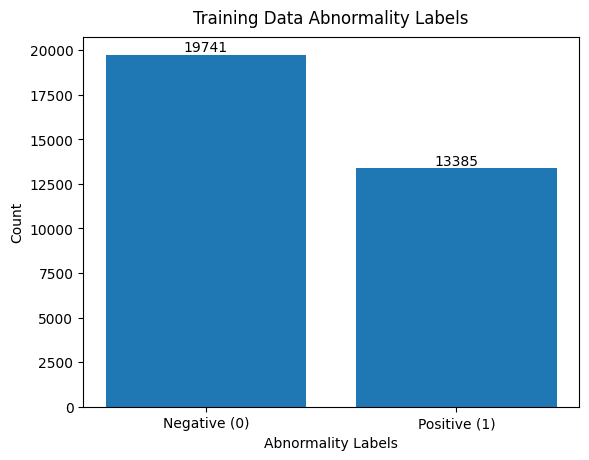

In [24]:
def print_labels(df, title):
    
    value_counts = df['label'].value_counts()
    
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Abnormality Labels')
    plt.ylabel('Count')
    plt.title(title, pad = 10)
    plt.xticks(value_counts.index, ['Negative (0)', 'Positive (1)'])
    for bar, count in zip(bars, value_counts.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha = 'center', va = 'bottom')
    
    plt.show()

print_labels(df_train, "Training Data Abnormality Labels")

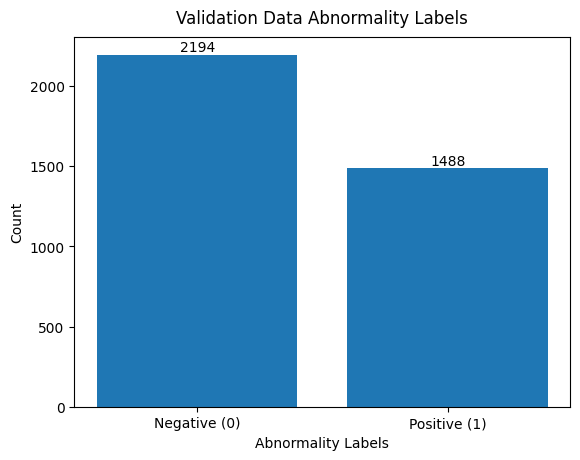

In [25]:
print_labels(df_valid, "Validation Data Abnormality Labels")

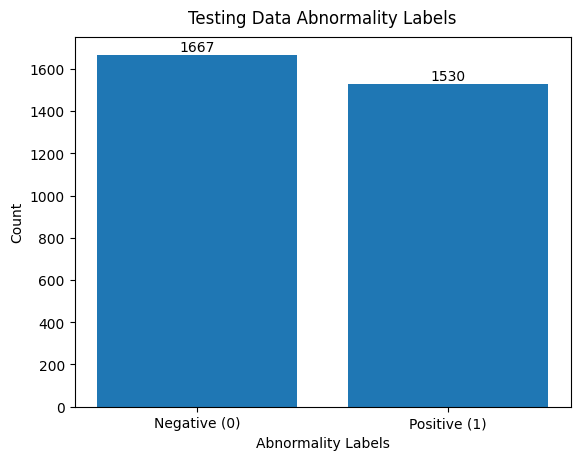

In [26]:
print_labels(df_test, "Testing Data Abnormality Labels")

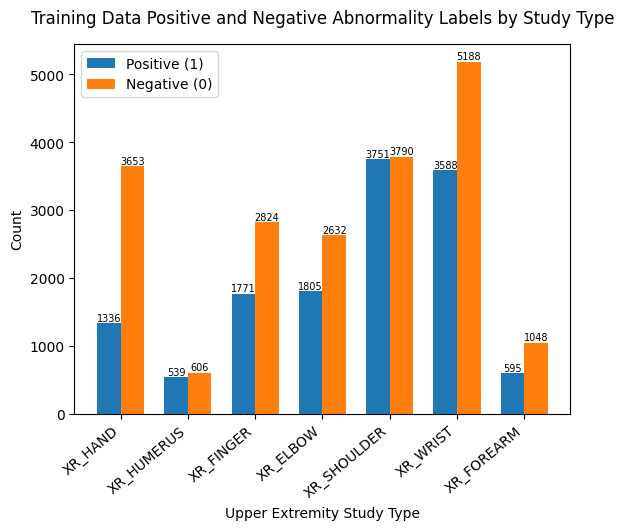

In [27]:
def print_labels_by_study_type(df, title):
    study_type_counts = []
    for study_type in study_types:
        positive_count = ((df.study_type == study_type) & (df.label == 1)).sum()
        negative_count = ((df.study_type == study_type) & (df.label == 0)).sum()
        study_type_counts.append((positive_count, negative_count))

    x = np.arange(len(study_types))
    width = 0.35
    
    fig, ax = plt.subplots()

    # Plot values
    positive_bars = ax.bar(x - width / 2, [count[0] for count in study_type_counts], width, label = 'Positive (1)')
    negative_bars = ax.bar(x + width / 2, [count[1] for count in study_type_counts], width, label = 'Negative (0)')
    ax.set_xlabel('Upper Extremity Study Type')
    ax.set_ylabel('Count')
    ax.set_title(title, pad = 15)
    ax.set_xticks(x)
    ax.set_xticklabels(study_types, rotation = 40, ha = 'right')
    ax.legend()
    
    for bar in positive_bars + negative_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 7)
    
    plt.show()

print_labels_by_study_type(df_train, "Training Data Positive and Negative Abnormality Labels by Study Type")

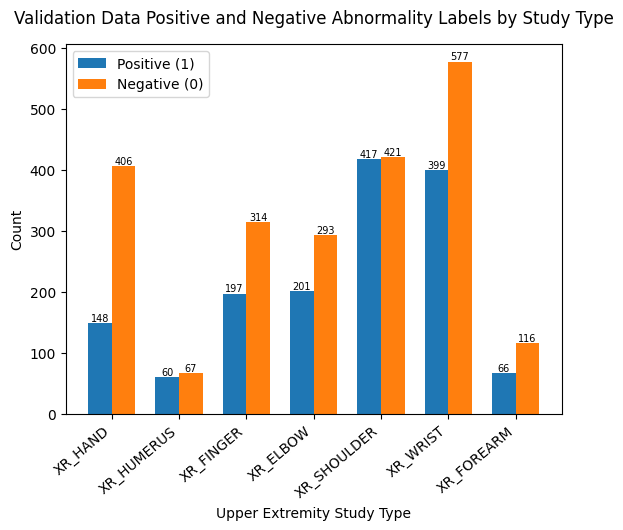

In [28]:
print_labels_by_study_type(df_valid, "Validation Data Positive and Negative Abnormality Labels by Study Type")

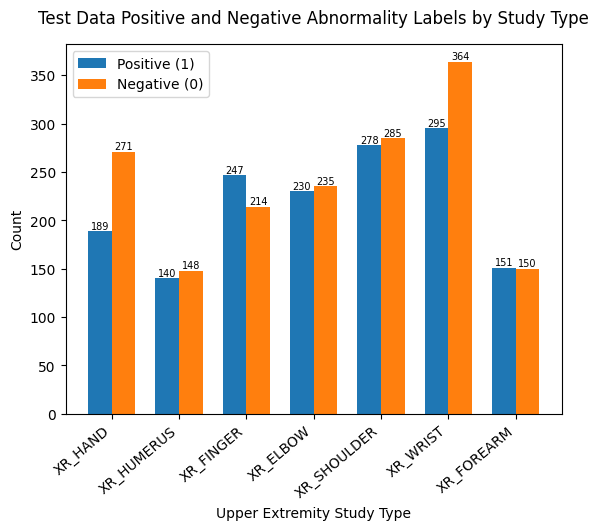

In [29]:
print_labels_by_study_type(df_test, "Test Data Positive and Negative Abnormality Labels by Study Type")

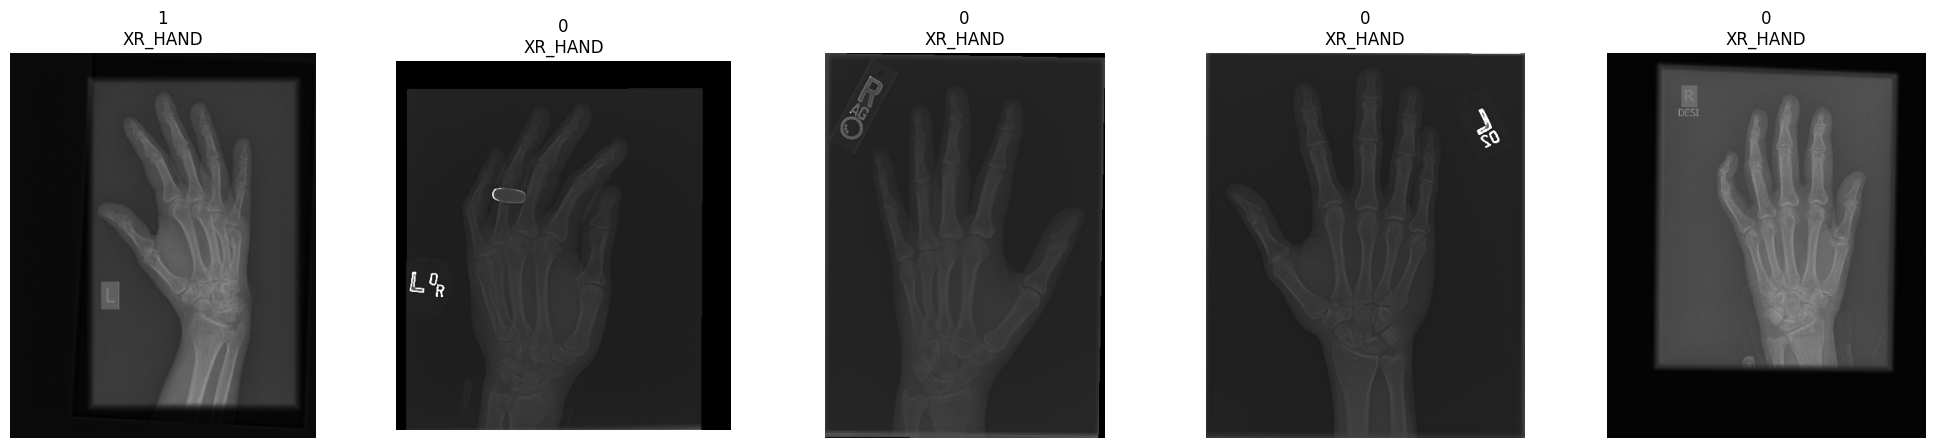

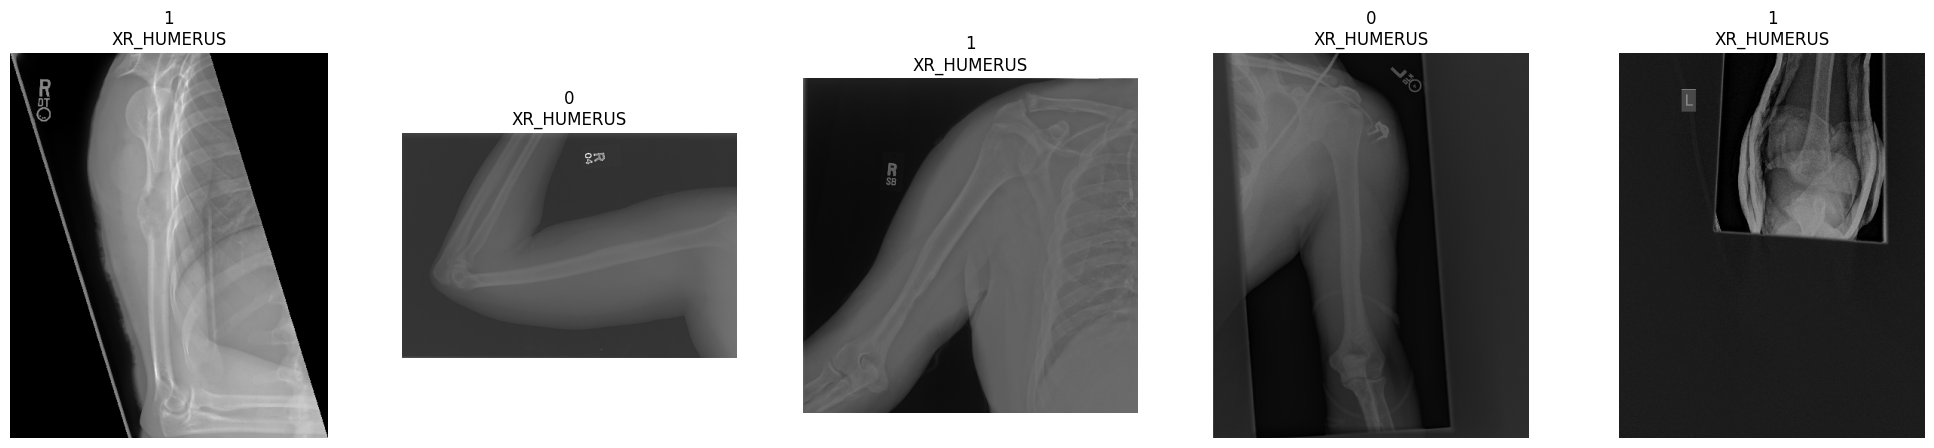

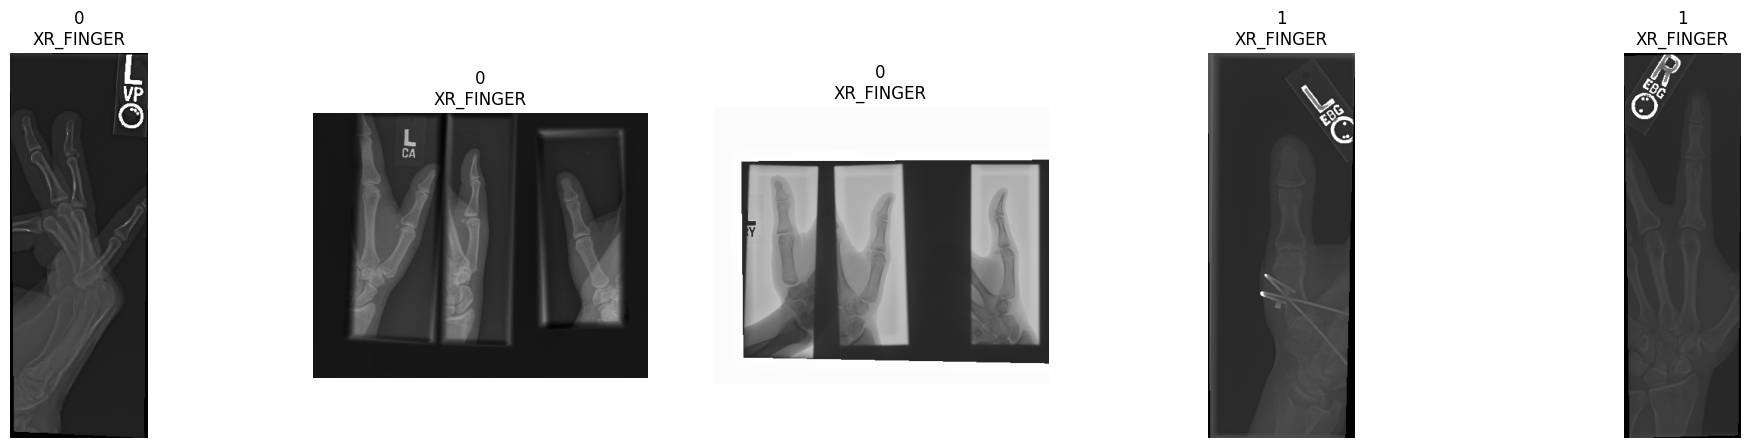

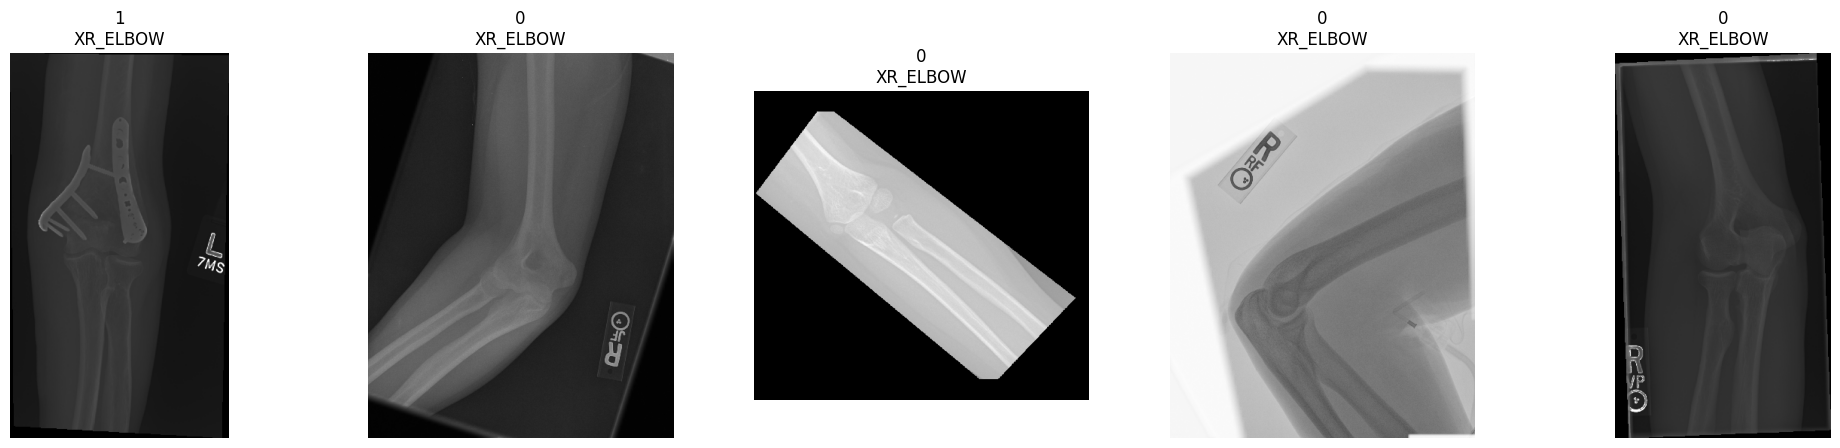

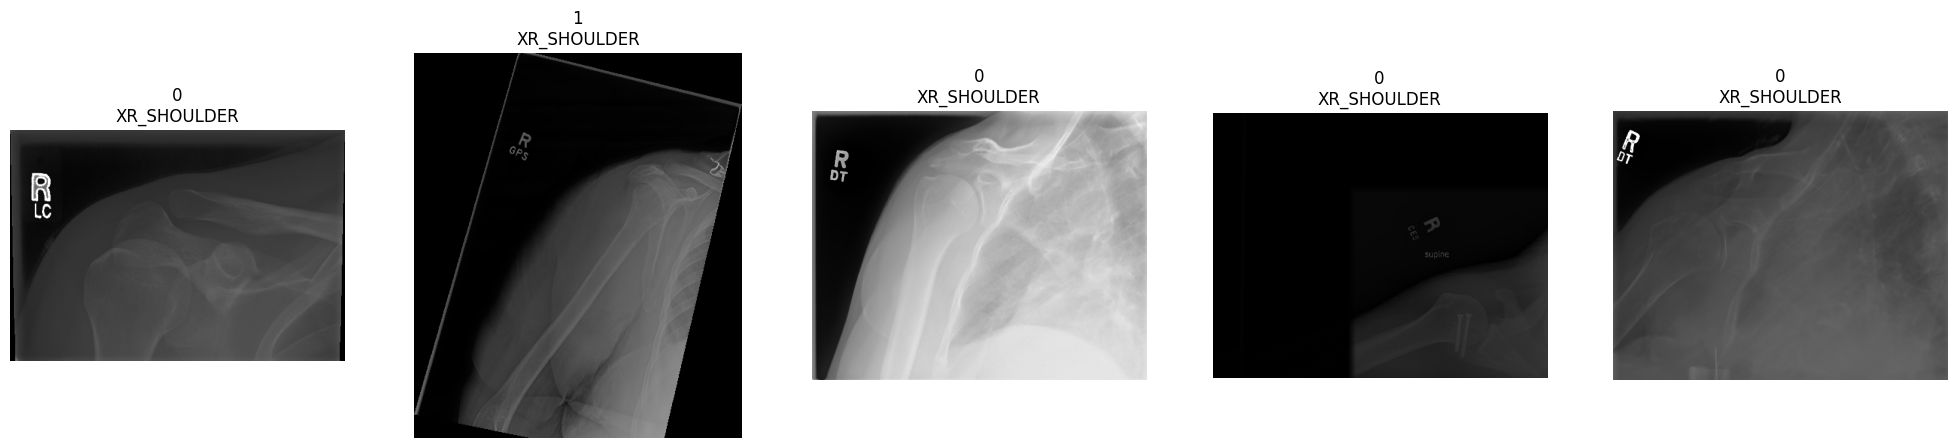

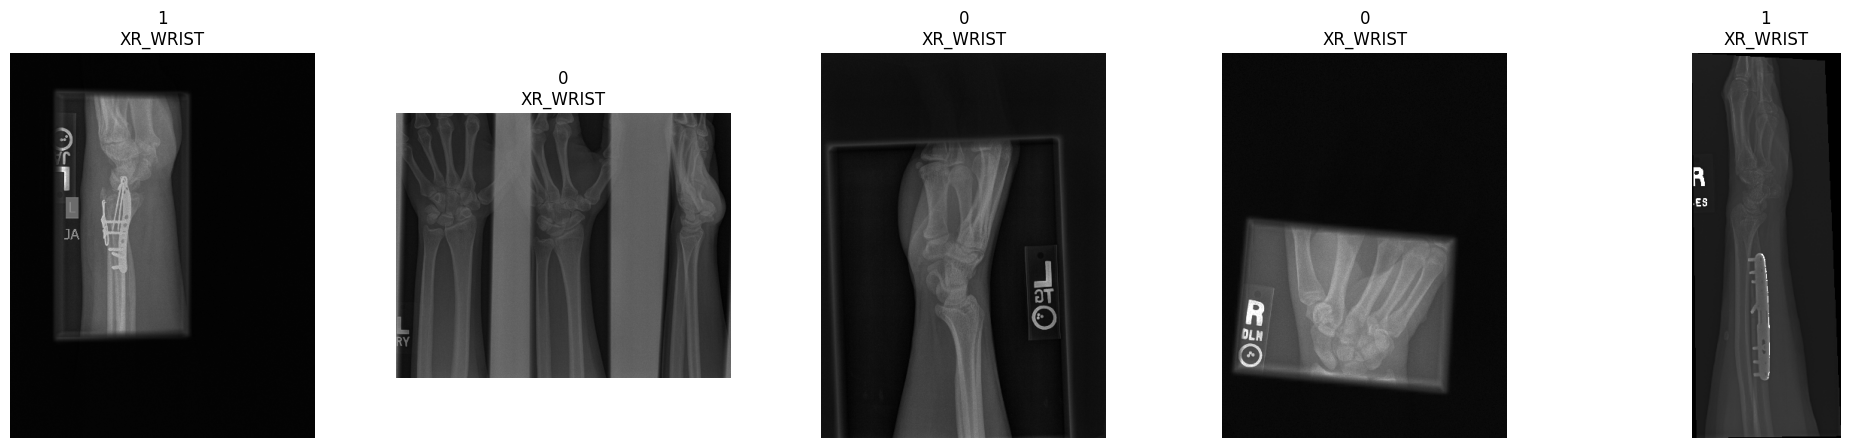

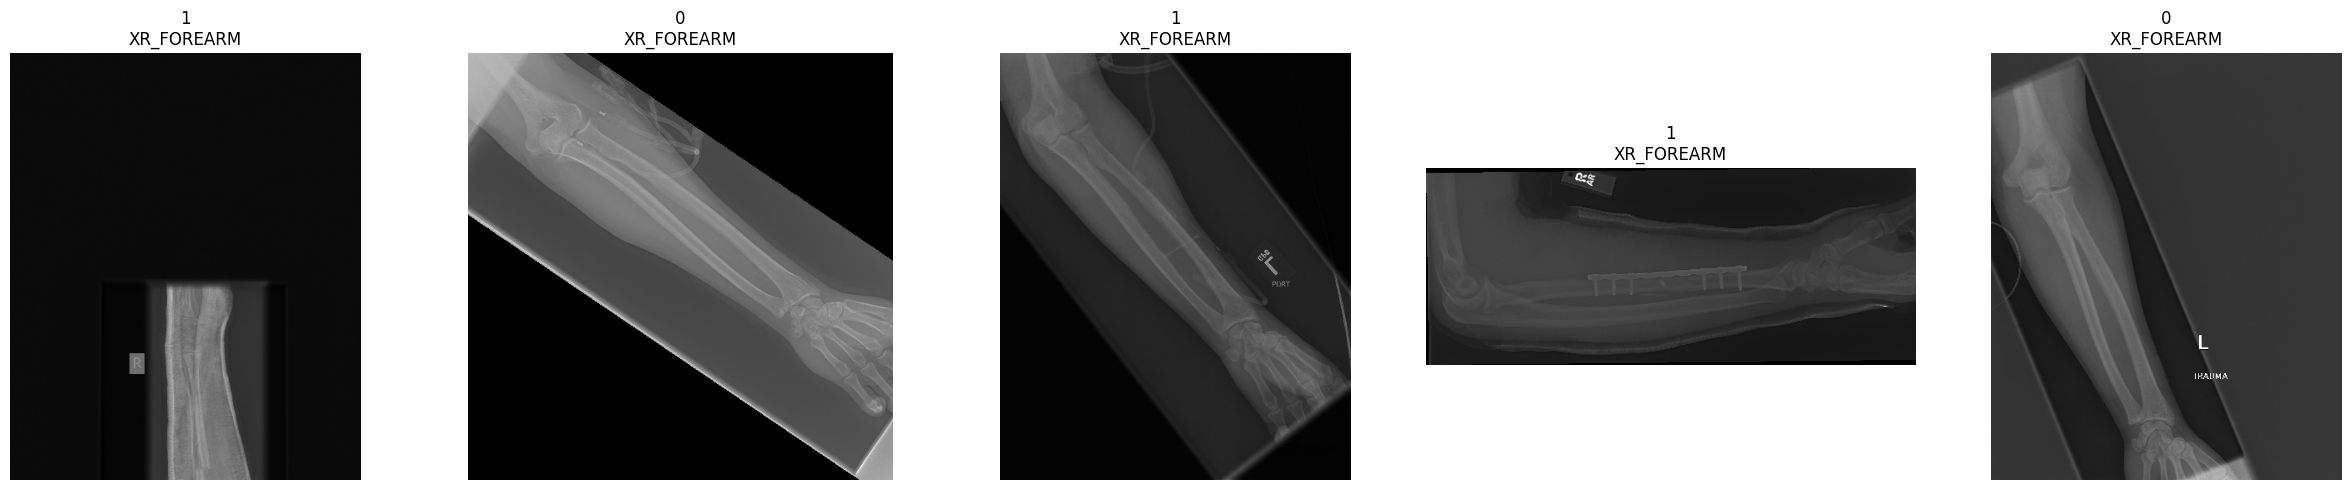

In [30]:
# michelle
# Display sample of training images
for study_type in study_types:
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    imgs = df_train[df_train['study_type'] == study_type].sample(n = 5)
    for i, (image, label) in enumerate(zip(imgs['img_path'], imgs['label'])):
        image = load_img(image)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(label) + "\n" + study_type, fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
# Convert labels to str
df_train['label'] = df_train['label'].replace({0: '0', 1: '1'})
df_valid['label'] = df_valid['label'].replace({0: '0', 1: '1'})
df_test['label'] = df_test['label'].replace({0: '0', 1: '1'})

In [32]:
# michelle
# Data augmentation
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 33126 validated image filenames belonging to 2 classes.


In [33]:
valid_generator = datagen.flow_from_dataframe(
    dataframe = df_valid,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3682 validated image filenames belonging to 2 classes.


In [34]:
test_generator = datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = False,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3197 validated image filenames belonging to 2 classes.


# DenseNet
the following resource was used as a guide to implement transfer learning with DenseNet:

https://www.kaggle.com/code/cafelatte1/alien-and-predator-classification-beginner/notebook

In [35]:
# amelia
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import keras
import random as rnd
import pathlib
import math
import re
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sequential
from tensorflow.keras import applications as pretrained
from tensorflow.python.client import device_lib
from tensorflow.keras import losses
from tensorflow.keras import metrics
from keras.utils import plot_model

# --- Processor option ---
# GPU setup
try:
    gpu = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(gpu[0], True)
except:
    print("None of GPUs are detected")

2024-04-19 20:15:09.113880: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-19 20:15:09.137730: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-19 20:15:09.137950: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [36]:
# amelia
# basic model parameters
cut_off = 0.5
epochs = 100

img_width = 224  # keep image sizes consistent with Michelle's code
img_height = 224
inputTensor = tf.keras.Input(shape=(img_width,img_height,3))


In [37]:
# michelle
# import tensorflow as tf
# import tensorflow.keras.backend as K
# from sklearn.metrics import cohen_kappa_score

# # Create custom cohen kappa metric since not in keras
# def cohen_kappa_metric(y_true, y_pred):
#     y_true = tf.cast(y_true, dtype=tf.float64)
#     y_pred = tf.cast(tf.round(y_pred), dtype=tf.float64)
#     kappa = tf.py_function(func=cohen_kappa, inp=[y_true, y_pred], Tout=tf.float64, name='cohen_kappa')
#     kappa.set_shape(())
#     return kappa

# # Helper function to calculate Cohen's kappa from sklearn
# def cohen_kappa(y_true, y_pred):
#     kappa = cohen_kappa_score(y_true, y_pred)
#     return kappa

# amelia
# https://www.kaggle.com/code/cafelatte1/alien-and-predator-classification-beginner/notebook
metricsVec = [
    metrics.BinaryAccuracy(threshold=cut_off),
    metrics.Precision(thresholds=cut_off),
    metrics.Recall(thresholds=cut_off),
    metrics.AUC(),
    # cohen_kappa_metric,
]

# Creating pretrained DenseNet model
def CreatingTopLayers(featureTensor):
    topLayers = None
    topLayers = sequential([
                    layers.GlobalAveragePooling2D(),
                    layers.Dropout(0.2),
                    layers.Dense(units=1, activation="sigmoid")
    ], name="Top_Layers")
    return(topLayers)

def create_model():
    # Loading the base model
    model_base = sequential([
         # layers.experimental.preprocessing.Rescaling(input_shape=(img_height, img_width, 3), scale=1.0/255, name="Rescailing"),
         # data_augmentation,
         pretrained.DenseNet201(input_shape=(img_width, img_height, 3), weights="imagenet", include_top=False)], name="Base_DenseNet201")

    model_base.trainable = False
    model_base.summary()

    featureTensor = model_base(inputTensor)
    topLayers = CreatingTopLayers(featureTensor)

    modified_model = sequential([model_base, topLayers], name="DenseNet201")
    modified_model.summary()

    modified_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*3),
        loss=losses.BinaryCrossentropy(from_logits=False),
        metrics=metricsVec)
    
    return modified_model
modified_model = create_model()

2024-04-19 20:15:09.155734: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-19 20:15:09.155958: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-19 20:15:09.156113: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "Base_DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ ?                      │    18,321,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Model: "DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Base_DenseNet201 (Sequential)   │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Top_Layers (Sequential)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

In [38]:
# amelia
# https://www.kaggle.com/code/cafelatte1/alien-and-predator-classification-beginner/notebook

def SquareRootScheduler(epochCount, lr):
    return lr * pow(epochCount+1.0, -0.5)

tmpEpochs = list(range(50))
tmpLr = list(map(lambda x: SquareRootScheduler(x, tf.keras.optimizers.Adam().get_config()["learning_rate"]*3), tmpEpochs))

# plt.figure(figsize=(16, 9))
# plt.rc('font', size=12)
# plt.plot(tmpEpochs, tmpLr, label='Training Accuracy')
# plt.title("Learning Scheduler")
# plt.xlabel("Epochs")
# plt.ylabel("Learning rate")

cb_lrscheduler = tf.keras.callbacks.LearningRateScheduler(SquareRootScheduler)
cb_earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=math.floor(epochs*0.1))

In [39]:
# amelia
# https://www.tensorflow.org/tutorials/keras/save_and_load
# code for saving model checkpoints
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Calculate the number of batches per epoch
import math
n_batches = len(train_generator) / batch_size
n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=30*n_batches)


In [44]:
# amelia
tf.random.set_seed(2000)

model_DenseNet201 = create_model()
# model_DenseNet201.save_weights(checkpoint_path.format(epoch=0))

import time
start_time = time.time()
history_DenseNet201 = None
history_DenseNet201 = model_DenseNet201.fit(
  train_generator,
  batch_size=None,
  validation_data=valid_generator,
  validation_batch_size=None,
  epochs=epochs,
  callbacks=[cb_lrscheduler, cb_earlystopping], #, cp_callback], (model trained faster than expected so removed this
  verbose=1
)
print(f'Trained model in {time.time()-start_time}s')


# saving out the model
model_DenseNet201.save('densenetmodel.keras')

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history_DenseNet201.history
# Save it under the form of a json file
json.dump(history_dict, open('densenetmodel_history.json', 'w'))

Model: "Base_DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ ?                      │    18,321,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Model: "DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Base_DenseNet201 (Sequential)   │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Top_Layers (Sequential)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Epoch 1/100


/home/amelia/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1713572280.940136    6579 service.cc:145] XLA service 0x7fd83c003d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713572280.940170    6579 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2024-04-19 20:18:01.528114: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-19 20:18:03.795494: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN versi

  1/518 ━━━━━━━━━━━━━━━━━━━━ 4:37:22 32s/step - auc: 0.5049 - binary_accuracy: 0.6094 - loss: 0.7327 - precision: 0.2857 - recall: 0.0909

I0000 00:00:1713572301.797932    6579 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


518/518 ━━━━━━━━━━━━━━━━━━━━ 154s 235ms/step - auc: 0.6852 - binary_accuracy: 0.6571 - loss: 0.6215 - precision: 0.5953 - recall: 0.4494 - val_auc: 0.7796 - val_binary_accuracy: 0.7279 - val_loss: 0.5484 - val_precision: 0.7177 - val_recall: 0.5383 - learning_rate: 0.0030
Epoch 2/100
518/518 ━━━━━━━━━━━━━━━━━━━━ 86s 165ms/step - auc: 0.7559 - binary_accuracy: 0.7125 - loss: 0.5682 - precision: 0.6805 - recall: 0.5390 - val_auc: 0.7862 - val_binary_accuracy: 0.6953 - val_loss: 0.5731 - val_precision: 0.5981 - val_recall: 0.7500 - learning_rate: 0.0021
Epoch 3/100
518/518 ━━━━━━━━━━━━━━━━━━━━ 87s 166ms/step - auc: 0.7631 - binary_accuracy: 0.7143 - loss: 0.5628 - precision: 0.6818 - recall: 0.5499 - val_auc: 0.7888 - val_binary_accuracy: 0.7325 - val_loss: 0.5483 - val_precision: 0.8093 - val_recall: 0.4422 - learning_rate: 0.0012
Epoch 4/100
518/518 ━━━━━━━━━━━━━━━━━━━━ 87s 165ms/step - auc: 0.7700 - binary_accuracy: 0.7205 - loss: 0.5548 - precision: 0.6955 - recall: 0.5445 - val_auc: 

In [46]:
# amelia
# checking that the model saving/loading works
# https://www.tensorflow.org/guide/keras/serialization_and_saving
# reconstructed_model = keras.models.load_model('densenetmodel.keras')

# np.testing.assert_allclose(
#     model_DenseNet201.predict(test_generator), reconstructed_model.predict(test_generator)
# )

In [47]:
# amelia
# prediciting on test data
test_generator.reset()
df_test['pred'] = model_DenseNet201.predict(test_generator).ravel()
df_test

50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 502ms/step


,study_type,patient_id,img_path,label,pred
0,XR_FOREARM,patient11463,MURA-v1.1/valid/XR_FOREARM/patient11463/study1...,0,0.443428
1,XR_FOREARM,patient11463,MURA-v1.1/valid/XR_FOREARM/patient11463/study1...,0,0.664170
2,XR_FOREARM,patient11449,MURA-v1.1/valid/XR_FOREARM/patient11449/study1...,0,0.158381
3,XR_FOREARM,patient11449,MURA-v1.1/valid/XR_FOREARM/patient11449/study1...,0,0.323850
4,XR_FOREARM,patient11408,MURA-v1.1/valid/XR_FOREARM/patient11408/study1...,1,0.216358
...,...,...,...,...,...
3192,XR_ELBOW,patient11536,MURA-v1.1/valid/XR_ELBOW/patient11536/study1_n...,0,0.344949
3193,XR_ELBOW,patient11402,MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...,0,0.126143
3194,XR_ELBOW,patient11402,MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...,0,0.117682
3195,XR_ELBOW,patient11875,MURA-v1.1/valid/XR_ELBOW/patient11875/study1_n...,0,0.575361


In [48]:
df_test['pred'] = np.where(df_test.pred>0.5, 1, 0)
df_test

,study_type,patient_id,img_path,label,pred
0,XR_FOREARM,patient11463,MURA-v1.1/valid/XR_FOREARM/patient11463/study1...,0,0
1,XR_FOREARM,patient11463,MURA-v1.1/valid/XR_FOREARM/patient11463/study1...,0,1
2,XR_FOREARM,patient11449,MURA-v1.1/valid/XR_FOREARM/patient11449/study1...,0,0
3,XR_FOREARM,patient11449,MURA-v1.1/valid/XR_FOREARM/patient11449/study1...,0,0
4,XR_FOREARM,patient11408,MURA-v1.1/valid/XR_FOREARM/patient11408/study1...,1,0
...,...,...,...,...,...
3192,XR_ELBOW,patient11536,MURA-v1.1/valid/XR_ELBOW/patient11536/study1_n...,0,0
3193,XR_ELBOW,patient11402,MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...,0,0
3194,XR_ELBOW,patient11402,MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...,0,0
3195,XR_ELBOW,patient11875,MURA-v1.1/valid/XR_ELBOW/patient11875/study1_n...,0,1


In [49]:
df_test.to_csv('test_w_preds.csv')

[0.7370994091033936,
 0.6274056984908275,
 0.791212260723114,
 0.5376140475273132,
 29]

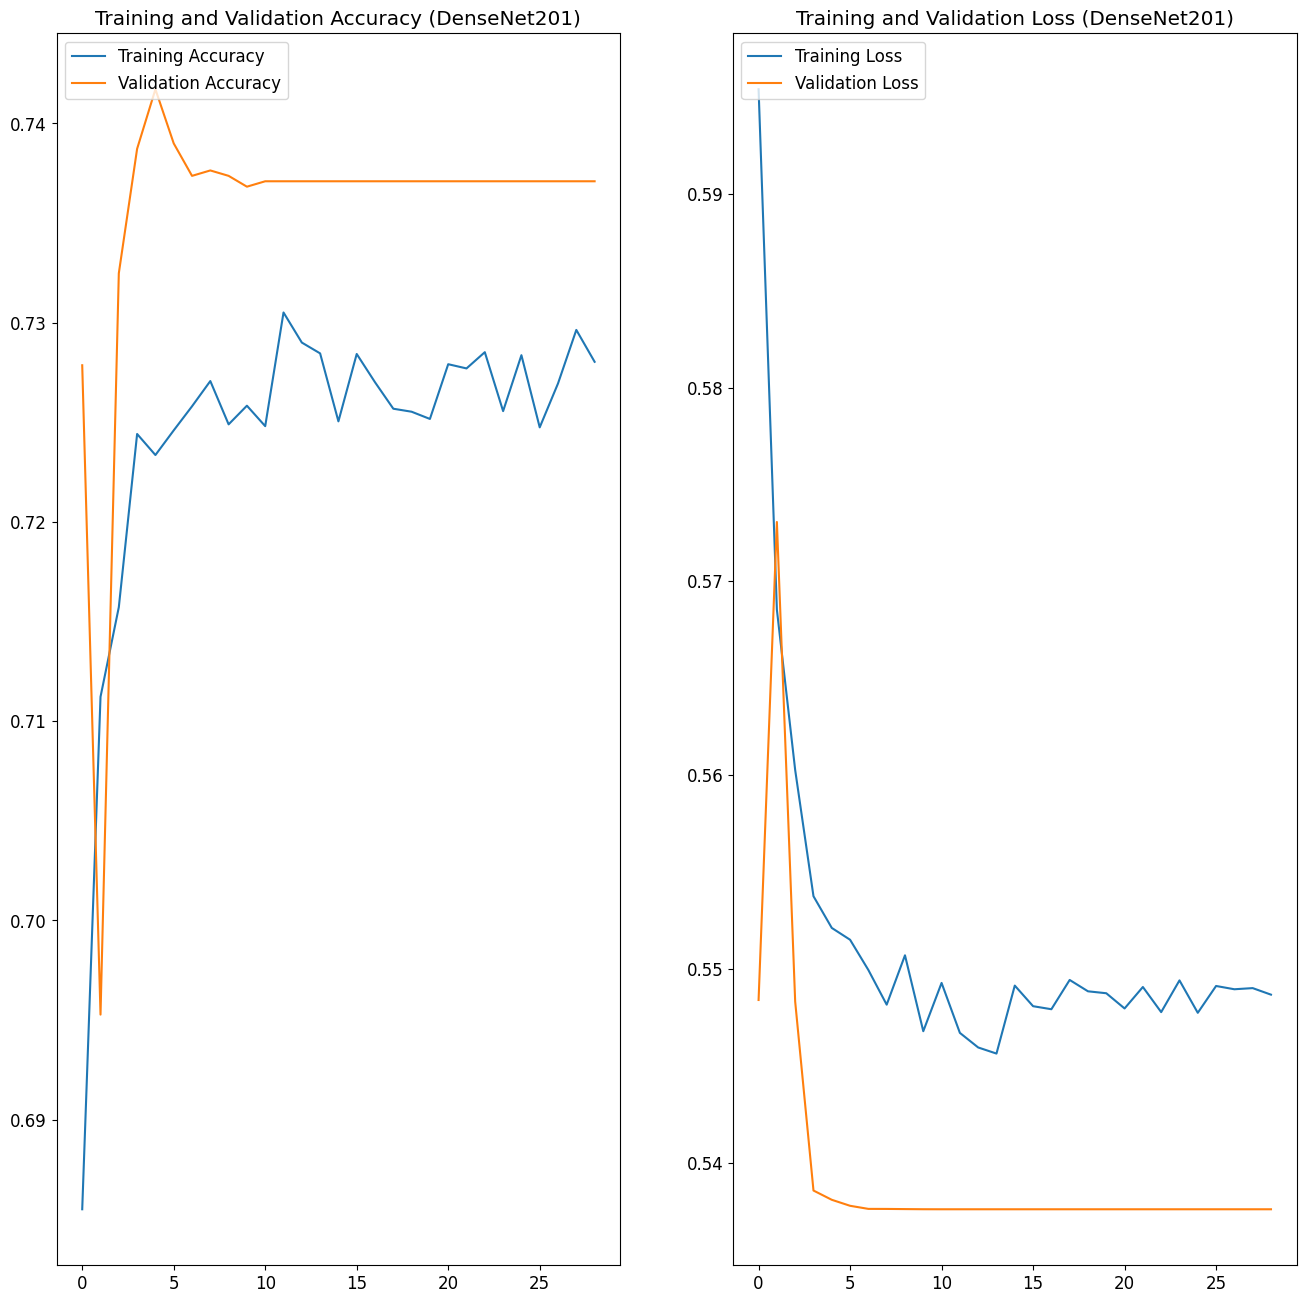

In [50]:
# this function pulled directly from:
# https://www.kaggle.com/code/cafelatte1/alien-and-predator-classification-beginner/notebook
def PlottingResult(his, result, name):
    acc = his.history['binary_accuracy']
    val_acc = his.history['val_binary_accuracy']
    loss = his.history['loss']
    val_loss = his.history['val_loss']

    plt.figure(figsize=(16, 16))
    plt.rc('font', size=12)

    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='upper left')
    title = 'Training and Validation Accuracy (' + his.model.name + ')'
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    title = 'Training and Validation Loss (' + his.model.name + ')'
    plt.title(title)
    

    bestIdx = 0
    val_accuracy = 0
    val_precision = 0
    val_recall = 0
    val_auc = 0
    val_f1 = 0

    for i,j in his.history.items():
        if "val_loss" in i:
            bestIdx = np.argmin(j)
            val_loss = j[-1]

    for i,j in his.history.items():
        if "val_binary_accuracy" in i:
            val_accuracy = j[-1]
        elif "val_precision" in i:
            val_precision = j[-1]
        elif "val_recall" in i:
            val_recall = j[-1]
        elif "val_auc" in i:
            val_auc = j[-1]

    val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall)

    return [val_accuracy, val_f1, val_auc, val_loss, len(his.epoch)]

result = pd.DataFrame({'Accuracy' : [None],
        'F1' : [None],
        'AUC' : [None],
        'Loss' : [None],
        'Epoch' : [None]                
})
result.index = ['DenseNet201']

result = PlottingResult(history_DenseNet201, result, 'DenseNet201')
result